# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [5]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

# Model description

The Heckscher-Ohlin theorem reveals the reasons why each country has a comparative advantage. They observe that: there are differences in the resources that each country possesses. For example, Argentina has a lot of fertile land, Saudi Arabia has a lot of oil.  And products can be classified according to the different factors of production required.

Based on these, they propose the H-O theorem, which states that a country will have a relative advantage in producing products that require a large use of the resources it has in abundance.

The model follows these assumptions:
- there are 2 countries to keep the model simpel
- there are 2 factors: capital and labor 
- Prices are the same everywhere
- Tastes in the 2 countries are the same, that means there are no differeneces in preferences
- There is perfect competition: firms choose outputlevel at which price = marginal costs, there is free entry and exit of firms in the market and the necessary information is available and perfect
- There are no transport costs
- There are no trade restrictions

Two-country model:

This code calculates the optimal production and utility levels for two closed economies, based on given parameters such as productivity, available labor and capital, and utility weight ratios. The economies produce two goods, with different capital vs. labor weight ratios in their production functions.

The production functions for the two goods are defined using lambda functions, which take as inputs the quantities of labor and capital used in each industry, and return the quantity produced. The utility functions are also defined using lambda functions, which take as inputs the weight ratio for each good in the utility function, as well as the quantities of labor and capital used in each industry, and return the overall utility level.

The code then uses nested loops to search through all possible combinations of labor and capital quantities for each country, in order to find the optimal levels that maximize utility. The optimal levels are determined by calculating the utility function for each combination and comparing it to the previous maximum utility found.

We consider the following parameters:

- Productivity in country $i$: $Ai$
- Labor in country $i$: $Li$
- Capital in country $i$: $Ki$
- Interest rate: $r$
- Wage rate: $w$




In [2]:
# Define parameters:

A1 = 1    # productivity of industry 1
A2 = 1    # productivity of industry 2

LA = 500   # total available labor of country A
LB = 100  # total available labour of country B
KA = 350  # total available capital of country A
KB = 200  # total available capital of country B

r = 0.03  # interest rate
w = 1     # wage rate

alpha1 = 1/3 # capital vs labor weight ratio in production of good 1
alpha2 = 2/3 # capital vs labor weight ratio in production of good 2

betaA = 0.5 # product 1 vs 2 weight ratio in utility for country A
betaB = 0.5 # product 1 vs 2 weight ratio in utility for country B

In [3]:
# Lambda functions:

# Define the production functions
Q1 = lambda L, K: A1 * (L ** (1 - alpha1)) * (K ** alpha1)
Q2 = lambda L_tot, L, K_tot, K: A2 * ((L_tot - L) ** (1 - alpha2)) * ((K_tot - K) ** alpha2)

# Maximum production possible for both goods for both countries
QA1_max = Q1(LA , KA)
QA2_max = Q2(LA, 0 , KA , 0)
QB1_max = Q1(LB , KB)
QB2_max = Q2(LB, 0 , KB , 0)




# Define the utility functions 
UA = lambda u, L, K:(Q1(L, K) ** u) * (Q2(LA, L, KA, K) ** (1 - u))
UB = lambda u, L, K:(Q1(L, K) ** u) * (Q2(LB, L, KB, K) ** (1 - u))

"""For closed economies"""
print("Without trade:")


# Calculate best utility for country 1:

UA_max = 0

for l in range(LA):
    for k in range(KA):

        utility1 = UA(betaA  , l , k)
        if utility1 > UA_max:
            UA_max = utility1
            L_optA = l
            K_optA = k
print("Country 1 maximizes their utility at %.1f by setting labor and capital for industry 1 at %.0f and %.0f" % (UA_max , L_optA , K_optA))

# Calculate best utility for country 2:

UB_max = 0

for l in range(LB):
    for k in range(KB):

        utility2 = UB(betaB , l , k)
        if utility2 > UB_max:
            UB_max = utility2
            L_optB = l
            K_optB = k

print("Country 2 maximizes their utility at %.1f by setting labor and capital for industry 1 at %.0f and %.0f\n" % (UB_max , L_optB , K_optB))

# Goods produced at given level:

QA1 = Q1(L_optA , K_optA)
QA2 = Q2(LA , L_optA , KA , K_optA)
QB1 = Q1(L_optB , K_optB)
QB2 = Q2(LB , L_optB , KB , K_optB)

print("Total production of country 1:\n Industry 1: %.1f \n Industry 2: %.1f \n\nTotal production of country 2:\n Industry 1: %.1f\n Industry 2: %.1f" % (QA1 , QA2 , QB1 , QB2))





Without trade:
Country 1 maximizes their utility at 221.4 by setting labor and capital for industry 1 at 333 and 117
Country 2 maximizes their utility at 74.8 by setting labor and capital for industry 1 at 67 and 67

Total production of country 1:
 Industry 1: 235.0 
 Industry 2: 208.5 

Total production of country 2:
 Industry 1: 67.0
 Industry 2: 83.6


In [22]:
# Using scipy instead of lamda and loops:
def objectiveA(x):
    k , l = x
    # Outputs
    q1 = A1 * (k ** alpha1) * (l ** (1 - alpha1))
    q2 = A2 * ((KA - k) ** alpha2) * ((LA - l) ** (1 - alpha2))

    # Utilities 
    ua = (q1 ** betaA) * (q2 ** (1 - betaA))

    return -ua

def objectiveB(x):
    k , l = x

    # Outputs
    q1 = A1*(k ** alpha1) * (l ** (1 - alpha1))
    q2 = A2*((KB - k) ** alpha2) * ((LB - l) ** (1 - alpha2))

    # Utilities 
    ub = (q1 ** betaB) * (q2 ** (1 - betaB))
    return -ub

# Constraints
def constraintA1(x):
    k , l = x
    return KA - k
def constraintA2(x):
    k , l = x
    return LA - l
def constraintB1(x):
    k , l = x
    return KB - k
def constraintB2(x):
    k , l = x
    return LB - l


# Constraints
consA = [{'type':'ineq', 'fun':constraintA1},
        {'type':'ineq', 'fun':constraintA2}]

consB = [{'type':'ineq', 'fun':constraintB1},
        {'type':'ineq', 'fun':constraintB2}]

x0A = [ KA/2 , LA/2 ] # initial guesses
x0B = [ KB/2 , LB/2 ]

boundsA = [(0, KA), (0, LA)]  # bounds of input variables
boundsB = [(0, KB), (0, LB)]

solA = optimize.minimize(objectiveA, x0A , method='SLSQP', bounds=boundsA, constraints=consA)

opt_KA , opt_LA , = solA.x[0] , solA.x[1]

QA1_closed = (opt_LA ** (1-alpha1)) * (opt_KA ** alpha1)
QA2_closed = ((LA-opt_LA) ** (1-alpha2)) * ((KA-opt_KA) ** alpha2)
UA_closed = (QA1_closed ** betaA) *( QA2_closed**(1-betaA))

print ("inputs are:\n LA = %.0f, KA = %.0f " % (opt_LA , opt_KA ))

QA1_closed = (opt_LA ** (1-alpha1)) * (opt_KA ** alpha1)
QA2_closed = ((LA-opt_LA) ** (1-alpha2)) * ((KA-opt_KA) ** alpha2)
UA_closed = (QA1_closed ** betaA) *( QA2_closed**(1-betaA))


solB = optimize.minimize(objectiveB, x0B , method='SLSQP', bounds=boundsB, constraints=consB)

opt_KB , opt_LB , = solB.x[0] , solB.x[1]

print (" LB = %.0f, KB = %.0f " % (opt_LB , opt_KB ))

QB1_closed = (opt_LB ** (1-alpha1)) * (opt_KB ** alpha1)
QB2_closed = ((LB-opt_LB) ** (1-alpha2)) * ((KB-opt_KB) ** alpha2)
UB_closed = (QB1_closed ** betaB) *( QB2_closed**(1-betaB))

print("Which gives a approximate utility of %.0f for country A and %.0f for country B" % (UA_closed , UB_closed))

inputs are:
 LA = 333, KA = 117 
 LB = 67, KB = 67 
Which gives a approximate utility of 221 for country A and 75 for country B


In the absence of trade, our model predicts that country 1 can maximize its utility by allocating 333 units of labor and 117 units of capital to industry 1, resulting in a maximum utility of 221.4. Meanwhile, country 2 can achieve a maximum utility of 74.8 by allocating 67 units of labor and 67 units of capital to industry 1.

As a result, country 1 produces 235 units of industry 1 and 208.5 units of industry 2, while country 2 produces 67 units of industry 1 and 83.6 units of industry 2. These results suggest that country 1 is more productive than country 2, due to its higher total production and utility.

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

MRS calculations

In [7]:
# Marginal Utility 

# Marginal rate of substitution:

dUA1 = betaA * QA1 ** (betaA-1)
dUA2 = betaA * QA2 ** (betaA-1)
dUB1 = betaB * QB1 ** (betaB-1)
dUB2 = betaB * QB2 ** (betaB-1)

MRSA = dUA1/dUA2
MRSB = dUB2/dUB1


print("\n MRS: \nCountry A:\n Product 1: %.4f\n Product 2: %.4f\n\nCountry B:\n Product 1: %.4f\n Product 2: %.4f" % (dUA1 , dUA2 , dUB1 , dUB2))
print("\nMRS, product 1 for product 2:\n\n Country A: %.3f\n\n Country B: %.3f" % (MRSA , MRSB))

#(Change in utility with one unit of labor added)
UA_diff_L = UA(betaA , (L_optA + 1) , K_optA)
UB_diff_L = UB(betaB , (L_optB + 1) , K_optB)

MRUAL = UA_diff_L - UA_max
MRUBL = UB_diff_L - UB_max

#(Change in utility with one unit of labor added)
UA_diff_K = UA(betaA , L_optA , (K_optA + 1))
UB_diff_K = UB(betaB , L_optB , (K_optB + 1))

MRUAK = UA_diff_K - UA_max
MRUBK = UB_diff_K - UB_max

print("\nMarginal utility:\n\n Country A:\n  Labor: %.4f\n  Capital: %.4f \n\n Country B:\n  Labor: %.4f\n  Capital: %.4f" % (MRUAL , MRUAK , MRUBL , MRUBK))




 MRS: 
Country A:
 Product 1: 0.0326
 Product 2: 0.0346

Country B:
 Product 1: 0.0611
 Product 2: 0.0547

MRS, product 1 for product 2:

 Country A: 0.942

 Country B: 0.895

Marginal utility:

 Country A:
  Labor: -0.0003
  Capital: -0.0034 

 Country B:
  Labor: -0.0142
  Capital: -0.0035


# Further analysis

In [20]:
# With trade

# Capital-Labor relationship

KLA = KA/LB
KLB = KA/LB

KL_diff = KLA - KLB
if KL_diff<0:
    print("country A is more labor intensive than country B")
elif KL_diff>0:
    print("country A is more capital intensive than country B")
elif KL_diff == 0:
    print("The countries have the same labor-capital ratio")

# minimizing function via scipy


def objective2(x):
    la , ka , lb , kb , t , tr = x

    # Outputs of Country A
    qa1 = A1*(ka ** alpha1) * (la ** (1 - alpha1))
    qa2 = A2*((KA - ka) ** alpha2) * ((LA - la) ** (1 - alpha2))

    # Outputs of Country B
    qb1 = A1*(kb ** alpha1) * (lb ** (1 - alpha1))
    qb2 = A2*((KB - kb) ** alpha2) * ((LB - lb) ** (1 - alpha2))

    # Possible levels of consumption after trade
    ca1 = qa1 - t
    ca2 = qa2 + (t * tr)
    cb1 = qb1 + t
    cb2 = qb2 - (t * tr)
    
    # Utilities 
    ua = (ca1 ** betaA) * (ca2 ** (1 - betaA)) 
    ub = (cb1 ** betaB) * (cb2 ** (1 - betaB))
    u_tot = ua + ub
    return -u_tot

# Constraints
def constraint21(x):
    la , ka , lb , kb , t , tr = x # Country A cant put more capital into product 1 than it has available
    return KA - ka
def constraint22(x):
    la , ka , lb , kb , t , tr = x # Country A cant put more labor into product 1 than it has available
    return LA - la
def constraint23(x):
    la , ka , lb , kb , t , tr = x # Country B cant put more capital into product 1 than it has available
    return KB - kb
def constraint24(x):
    la , ka , lb , kb , t , tr = x # Country B cant put more labor into product 1 than it has available
    return LB - lb
def constraint25(x):
    la , ka , lb , kb , t , tr = x # Country A cant trade more than they have of product 1
    return QA1_max - t
def constraint26(x):
    la , ka , lb , kb , t , tr = x # Country B cant trade more than they have of product 1
    return  QB1_max + t
def constraint27(x):
    la , ka , lb , kb , t , tr = x # Country A cant trade more than they have of product 2
    return QA2_max + (t * tr)
def constraint28(x):
    la , ka , lb , kb , t , tr = x # Country B cant trade more than they have of product 2
    return QB2_max - (t * tr)

cons_2 = [{'type':'ineq', 'fun':constraint21},
          {'type':'ineq', 'fun':constraint22},
          {'type':'ineq', 'fun':constraint23},
          {'type':'ineq', 'fun':constraint24},
          {'type':'ineq', 'fun':constraint25},
          {'type':'ineq', 'fun':constraint26},
          {'type':'ineq', 'fun':constraint27},
          {'type':'ineq', 'fun':constraint28}]


x0 = [opt_KA , opt_LA , opt_KB , opt_LB , 70 , 1 ] # initial guess


bounds_2 = [(0, LA), (0, KA), (0, LB), (0, KB) , (0, QA1_max) , (0.001, None)]  # bounds of input variables

sol2 = optimize.minimize(objective2, x0 , method='SLSQP', bounds=bounds_2, constraints=cons_2)

LTA , KTA , LTB , KTB , T1 , Tr = sol2.x[0] , sol2.x[1] , sol2.x[2] , sol2.x[3] , sol2.x[4] , sol2.x[5]

print ("inputs are  LA = %.0f, KA = %.0f, LB = %.0f, KB = %.0f, T = %.0f and , Tr = %.2f " % (LTA , KTA , LTB , KTB , T1 , Tr))

trade1 = sol2.x[4]
trade_rate = sol2.x[5]
trade2 = trade1 * trade_rate

print("\nTrade: %.0f units of good 1 for %.0f units of good 2" % (trade1 , trade2))

print(LA , LTA, KA , KTA)
print(LB , LTB , KB , KTB)

# Goods Produced
PA1 = Q1(LTA ,  KTA) 
PA2 = Q2(LA , LTA, KA , KTA) 
PB1 = Q1(LTB , KTB)
PB2 = Q2(LB , LTB , KB , KTB)

# Goods consumed
CA1 = PA1 - trade1
CA2 = PA1 + (trade1 * trade_rate)
CB1 = PB1 + trade1
CB2 = PB2 - (trade1 * trade_rate)

print("\nCountry A:\n product 1: %.0f produced, %.0f consumed\n product 2: %.0f produced, %.0f consumed\n product 1: %.0f produced, %.0f consumed \n product 2: %.0f produced, %.0f consumed " % (PA1 , CA1 , PA2 , CA2 , PB1 , CB1 , PB2 , CB2))

Ut_A = CA1**betaA*CA2**(1-betaA)
Ut_B = CB1**betaB*CB2**(1-betaB)

print("\nUtility of country A: \nbefore trade: %.0f\nafter trade: %.0f\n\nUtility of country B:\nbefore trade: %.0f\nafter trade: %.0f\n" % (UA_closed, Ut_A ,  UB_closed , Ut_B))




# Find marginal rate of substitution:



The countries have the same labor-capital ratio
inputs are  LA = 405, KA = 181, LB = 0, KB = 0, T = 19 and , Tr = 7.33 

Trade: 19 units of good 1 for 140 units of good 2
500 405.2459404065019 350 180.85673168584367
100 0.0 200 0.0

Country A:
 product 1: 310 produced, 291 consumed
 product 2: 139 produced, 450 consumed
 product 1: 0 produced, 19 consumed 
 product 2: 159 produced, 18 consumed 

Utility of country A: 
before trade: 221
after trade: 362

Utility of country B:
before trade: 75
after trade: 19



# Conclusion

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

To make it easier to understand we want to provide some vizualizations to our code. First we show hom many units each country produces in both Industries in absence of trade

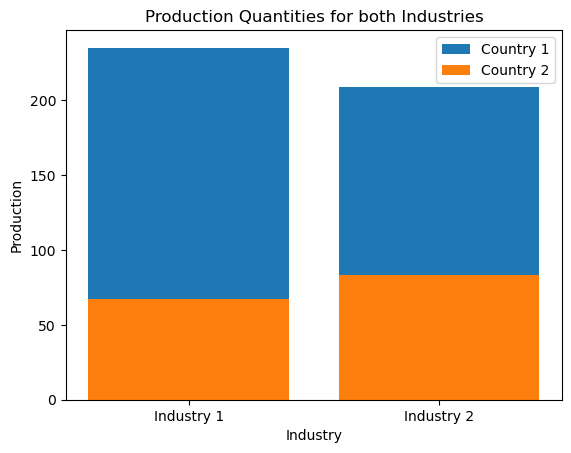

In [9]:
#code vizualization

# Plotting the production quantities
country_labels = ['Country 1', 'Country 2']
industry_labels = ['Industry 1', 'Industry 2']
production_quantities = [[QA1, QA2], [QB1, QB2]]

fig, ax = plt.subplots()

# Create bar plots
for i in range(len(country_labels)):
    ax.bar(industry_labels, production_quantities[i], label=country_labels[i])

# Add labels and title
ax.set_xlabel('Industry')
ax.set_ylabel('Production')
ax.set_title('Production Quantities for both Industries')

# Add legend
ax.legend()

# Display the plot
plt.show()

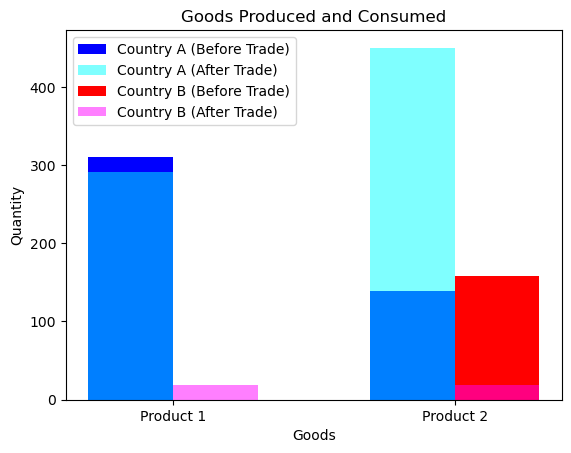

In [10]:

# Visualization of trade
goods = ['Product 1', 'Product 2']
country_A_before = [PA1, PA2]
country_A_after = [CA1, CA2]
country_B_before = [PB1, PB2]
country_B_after = [CB1, CB2]

# Bar width
bar_width = 0.3

# Set positions of the bars on the x-axis
r1 = np.arange(len(goods))
r2 = [x + bar_width for x in r1]

# Plot the bar charts
plt.bar(r1, country_A_before, color='blue', width=bar_width, label='Country A (Before Trade)')
plt.bar(r1, country_A_after, color='cyan', width=bar_width, label='Country A (After Trade)', alpha=0.5)
plt.bar(r2, country_B_before, color='red', width=bar_width, label='Country B (Before Trade)')
plt.bar(r2, country_B_after, color='magenta', width=bar_width, label='Country B (After Trade)', alpha=0.5)

# Add x-axis labels and title
plt.xlabel('Goods')
plt.ylabel('Quantity')
plt.title('Goods Produced and Consumed')

# Add legend
plt.legend()

# Set x-axis tick labels
plt.xticks([r + bar_width/2 for r in range(len(goods))], goods)

# Display the plot
plt.show()


As an extension we want to see how the optimal behavior of a country changes with different shocks, hence we consider: 

- An Earthquake in country 1 that destroys capital: $K$ falls 
- Technological improvment in country 1: $A1$ increases
- A Policy that allows for more Migration leading to more Laborforce in country 1: $L1$ increases

We want to test these adjusments under ceteris paribus assumption. 

In [23]:
#code extension

# Define the shock
capital_shock = 50

# Update the capital variables
KA_shocked = KA - capital_shock
KB_shocked = KB - capital_shock

# Update the objective function
def objective2(x):
    la, ka, lb, kb, t, tr = x

    # Outputs of Country A
    qa1 = A1 * (ka ** alpha1) * (la ** (1 - alpha1))
    qa2 = A2 * ((KA_shocked - ka) ** alpha2) * ((LA - la) ** (1 - alpha2))

    # Outputs of Country B
    qb1 = A1 * (kb ** alpha1) * (lb ** (1 - alpha1))
    qb2 = A2 * ((KB_shocked - kb) ** alpha2) * ((LB - lb) ** (1 - alpha2))

    # Possible levels of consumption after trade
    ca1 = qa1 - t
    ca2 = qa2 + (t * tr)
    cb1 = qb1 + t
    cb2 = qb2 - (t * tr)

    # Utilities
    ua = (ca1 ** betaA) * (ca2 ** (1 - betaA))
    ub = (cb1 ** betaB) * (cb2 ** (1 - betaB))
    u_tot = ua + ub
    return -u_tot

modelproject.model.trade()



# Find marginal rate of substitution:


NameError: name 'opt_KA' is not defined

In [15]:
# Define the shock of productivity

productivity_shock = 0.2  # 20% increase in productivity

# Update the productivity parameters
A1_shocked = A1 * (1 + productivity_shock)
A2_shocked = A2 * (1 + productivity_shock)

# Update the objective function
def objective2(x):
    la, ka, lb, kb, t, tr = x

    # Outputs of Country A
    qa1 = A1_shocked * (ka ** alpha1) * (la ** (1 - alpha1))
    qa2 = A2_shocked * ((KA - ka) ** alpha2) * ((LA - la) ** (1 - alpha2))

    # Outputs of Country B
    qb1 = A1_shocked * (kb ** alpha1) * (lb ** (1 - alpha1))
    qb2 = A2_shocked * ((KB - kb) ** alpha2) * ((LB - lb) ** (1 - alpha2))

    # Possible levels of consumption after trade
    ca1 = qa1 - t
    ca2 = qa2 + (t * tr)
    cb1 = qb1 + t
    cb2 = qb2 - (t * tr)

    # Utilities
    ua = (ca1 ** betaA) * (ca2 ** (1 - betaA))
    ub = (cb1 ** betaB) * (cb2 ** (1 - betaB))
    u_tot = ua + ub
    return -u_tot

def constraint21(x):
            la , ka , lb , kb , t , tr = x # Country A cant put more capital into product 1 than it has available
            return KA - ka

def constraint22(x):
    la , ka , lb , kb , t , tr = x # Country A cant put more labor into product 1 than it has available
    return LA - la
def constraint23(x):
    la , ka , lb , kb , t , tr = x # Country B cant put more capital into product 1 than it has available
    return KB - kb
def constraint24(x):
    la , ka , lb , kb , t , tr = x # Country B cant put more labor into product 1 than it has available
    return LB - lb
def constraint25(x):
    la , ka , lb , kb , t , tr = x # Country A cant trade more than they have of product 1
    return QA1_max - t
def constraint26(x):
    la , ka , lb , kb , t , tr = x # Country B cant trade more than they have of product 1
    return  QB1_max + t
def constraint27(x):
    la , ka , lb , kb , t , tr = x # Country A cant trade more than they have of product 2
    return QA2_max + (t * tr)
def constraint28(x):
    la , ka , lb , kb , t , tr = x # Country B cant trade more than they have of product 2
    return QB2_max - (t * tr)

cons_2 = [{'type':'ineq', 'fun':constraint21},
          {'type':'ineq', 'fun':constraint22},
          {'type':'ineq', 'fun':constraint23},
          {'type':'ineq', 'fun':constraint24},
          {'type':'ineq', 'fun':constraint25},
          {'type':'ineq', 'fun':constraint26},
          {'type':'ineq', 'fun':constraint27},
          {'type':'ineq', 'fun':constraint28}]

x0 = [opt_KA , opt_LA , opt_KB , opt_LB , 70 , 1 ] # initial guess


bounds_2 = [(0, LA), (0, KA), (0, LB), (0, KB) , (0, QA1_max) , (0.001, None)]  # bounds of input variables

sol2 = optimize.minimize(objective2, x0 , method='SLSQP', bounds=bounds_2, constraints=cons_2)

LTA , KTA , LTB , KTB , T1 , Tr = sol2.x[0] , sol2.x[1] , sol2.x[2] , sol2.x[3] , sol2.x[4] , sol2.x[5]

print ("inputs are  LA = %.0f, KA = %.0f, LB = %.0f, KB = %.0f, T = %.0f and , Tr = %.2f " % (LTA , KTA , LTB , KTB , T1 , Tr))

trade1 = sol2.x[4]
trade_rate = sol2.x[5]
trade2 = trade1 * trade_rate

print("\nTrade: %.0f units of good 1 for %.0f units of good 2" % (trade1 , trade2))

print(LA , LTA, KA , KTA)
print(LB , LTB , KB , KTB)

# Goods Produced
PA1 = Q1(LTA ,  KTA) 
PA2 = Q2(LA , LTA, KA , KTA) 
PB1 = Q1(LTB , KTB)
PB2 = Q2(LB , LTB , KB , KTB)

# Goods consumed
CA1 = PA1 - trade1
CA2 = PA1 + (trade1 * trade_rate)
CB1 = PB1 + trade1
CB2 = PB2 - (trade1 * trade_rate)

print("\nCountry A:\n product 1: %.0f produced, %.0f consumed\n product 2: %.0f produced, %.0f consumed\n product 1: %.0f produced, %.0f consumed \n product 2: %.0f produced, %.0f consumed " % (PA1 , CA1 , PA2 , CA2 , PB1 , CB1 , PB2 , CB2))

Ut_A = CA1**betaA*CA2**(1-betaA)
Ut_B = CB1**betaB*CB2**(1-betaB)

print("\nUtility of country A: \nbefore trade: %.0f\nafter trade: %.0f\n\nUtility of country B:\nbefore trade: %.0f\nafter trade: %.0f\n" % (UA_closed, Ut_A ,  UB_closed , Ut_B))





inputs are  LA = 405, KA = 181, LB = 0, KB = 0, T = 33 and , Tr = 4.81 

Trade: 33 units of good 1 for 159 units of good 2
500 405.25141120836776 350 180.85412800211984
100 0.0006932389495334547 200 0.00043071844480268917

Country A:
 product 1: 310 produced, 277 consumed
 product 2: 139 produced, 468 consumed
 product 1: 0 produced, 33 consumed 
 product 2: 159 produced, -0 consumed 

Utility of country A: 
before trade: 221
after trade: 360

Utility of country B:
before trade: 75
after trade: nan



C:\Users\Yas\AppData\Local\Temp\ipykernel_1132\3187831122.py:103: RuntimeWarning: invalid value encountered in double_scalars
  Ut_B = CB1**betaB*CB2**(1-betaB)


Add concise conclusion. 

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 